In [56]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler , PolynomialFeatures
from sklearn.metrics import r2_score , mean_absolute_error , mean_squared_error


In [57]:
df = pd.read_csv(r'C:\Users\amaya\Desktop\DS_PROJECTS\winequality-red.csv')

In [58]:
print(df.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

In [59]:
print(df.isnull().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [60]:
X = df.drop('quality' , axis =1)
y= df['quality']

In [61]:
scaler = StandardScaler()
X = scaler.fit_transform(X)


In [62]:
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

In [64]:
model = LinearRegression()
model.fit(X_train , y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [65]:
y_pred = model.predict(X_test)

In [66]:
print("R2_score", r2_score(y_test , y_pred))
print("MAE: ", mean_absolute_error(y_test , y_pred))
print("MSE: ", mean_squared_error(y_test , y_pred))

R2_score 0.41568006441028527
MAE:  0.49477399099948477
MSE:  0.3818565016575012


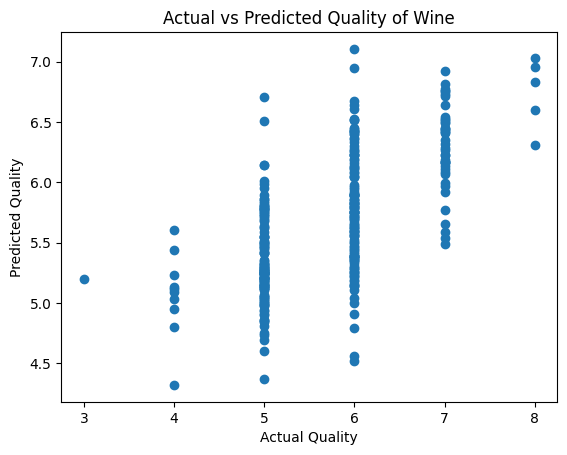

In [67]:
plt.scatter(y_test , y_pred)
plt.xlabel("Actual Quality")
plt.ylabel("Predicted Quality")
plt.title("Actual vs Predicted Quality of Wine")
plt.show()
